In [1]:
#Problem Definition & Setup

In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
#Data Loading

In [8]:
# Load dataset (Example structure)
df = pd.read_csv("D:\AI_RnD\SupplySmartSolution\SupplySmartSolution\data\interim\DataCoSupplyChainDataset.csv", encoding="latin1")

# First look
print(df.shape)        # e.g., (7043, 21)
print(df.info())       # Check data types and nulls
 # Check Class Balance

(180519, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname   

In [ ]:
#Exploratory Data Analysis

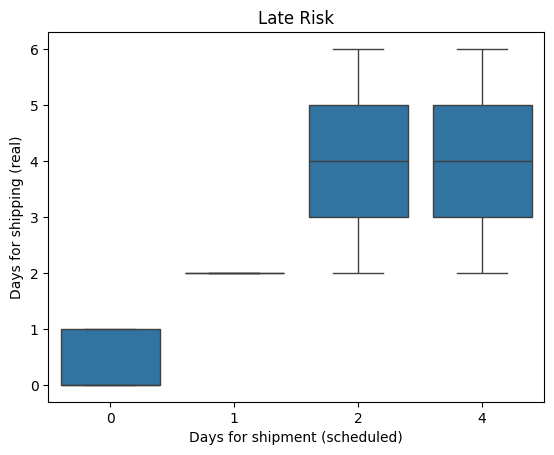

In [12]:
#Numerical Analysis
sns.boxplot(x='Days for shipment (scheduled)', y='Days for shipping (real)', data=df)
plt.title("Late Risk")
plt.show()

In [29]:
#Categorical Analysis
# Create correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
numeric_df.drop(to_drop, axis=1, inplace=True)
# Strategy: Drop columns with >40-50% missing data unless specific domain knowledge says otherwise.

In [30]:
numeric_df = numeric_df.drop(columns=['Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Order Id', 'Order Zipcode', 'Product Description'])
numeric_df

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Latitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Product Status
0,3,4,91.250000,314.640015,0,18.251453,13.110000,0.04,327.750000,0.29,1,0
1,5,4,-249.089996,311.359985,1,18.279451,16.389999,0.05,327.750000,-0.80,1,0
2,4,4,-247.779999,309.720001,0,37.292233,18.030001,0.06,327.750000,-0.80,1,0
3,3,4,22.860001,304.809998,0,34.125946,22.940001,0.07,327.750000,0.08,1,0
4,2,4,134.210007,298.250000,0,18.253769,29.500000,0.09,327.750000,0.45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,40.640930,0.000000,0.00,399.980011,0.10,1,0
180515,3,2,-613.770019,395.980011,1,35.362545,4.000000,0.01,399.980011,-1.55,1,0
180516,5,4,141.110001,391.980011,1,41.629959,8.000000,0.02,399.980011,0.36,1,0
180517,3,4,186.229996,387.980011,0,18.213350,12.000000,0.03,399.980011,0.48,1,0


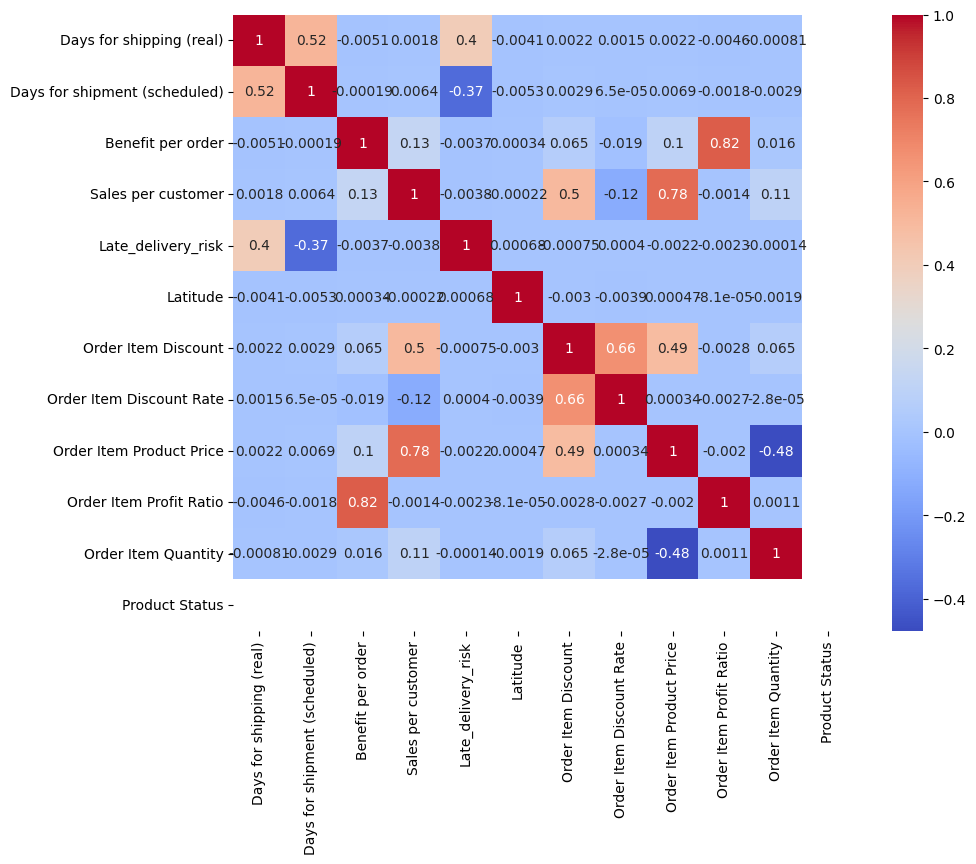

In [31]:
#Correlation Check
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

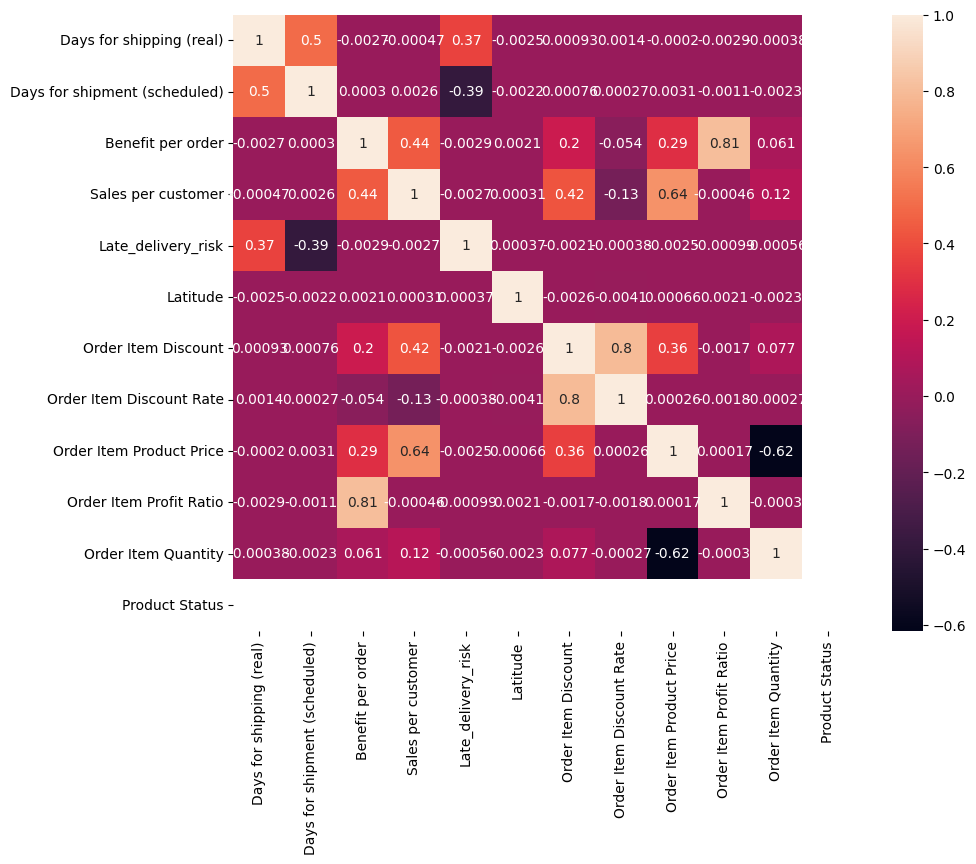

In [34]:
#Correlation Check
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(method='spearman'), annot=True)
plt.show()

In [41]:
# Save Preprocessed Data 
numeric_df.to_csv('D:\AI_RnD\SupplySmartSolution\SupplySmartSolution\data\processed\supply.csv') 

In [ ]:
#Evaluation

In [ ]:
#Conclusion & Deployment